# StackOverflow 2016 Developer Survey - Jupyter Notebook

This is a small repo containing the 2016 StackOverflow Developer Survey raw data as a sqlite database and exposed via a jupyter/ipython notebook for playing with the data simply.

I'm not super practiced with pandas - if you take a look at this and make some interesting visualizations, pull requests welcome.


## Installation

```python
# In a virtual env of some kind
pip install -r requirements.pip
jupyter notebook
```

## Schema

The developer survey is exposed as a SQLite database for flexibility, in `data`. In our example below, we just select everything and play with it in `pandas`, but you could select a segment or not use `pandas` if you like.

The fields are described in the developer survey readme, copied here: [docs/Stack-README.md](docs/Stack-README.md)

All sqlite content is currently left as is (with types chosen as appropriate). You may need to convert empty values to NaN's and such for analysis.


## License

MIT License - see [LICENSE.md](LICENSE.md).

The Public 2016 Stack Overflow Developer Survey Results (which this repo makes use of) - is made available under the Open Database License (ODbL):
http://opendatacommons.org/licenses/odbl/1.0/. Any rights in individual contents of the database are licensed under the Database Contents License:
http://opendatacommons.org/licenses/dbcl/1.0/

## Example

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import sqlite3

In [2]:
db = sqlite3.connect('data/2016-stackoverflow-results.sqlite')

In [3]:
df = pd.read_sql_query("select * from results", db)

In [4]:
# Get a sense of the data
df[:5]

,id,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22,Male,Programmer,,...,,,,,,,,,,
1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32,Male,Developer; Engineer; Programmer,Mobile developer - iOS,...,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,,,,,,...,,,,,,,,,,
3,21378,Facebook,Afghanistan,Southern Asia,Central Asia,,,Female,Engineer,DevOps,...,I don't care about this,This is somewhat important,This is very important,This is very important,I don't care about this,I don't care about this,This is very important,This is somewhat important,Corporate policies; Interacting with non-techn...,To get help for my job; Beacause I love to learn
4,30280,Facebook,Afghanistan,Southern Asia,Central Asia,> 60,65,Prefer not to disclose,Developer; Engineer; Programmer; Sr. Developer...,,...,,,,,,,,,,


In [5]:
age_counts = df['age_range'].value_counts()

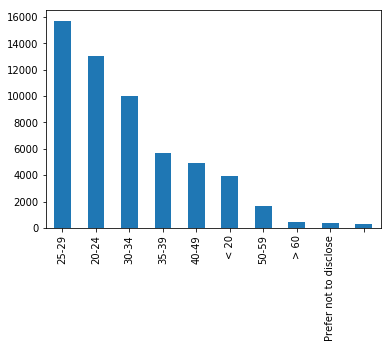

In [6]:
# What age ranges filled out the survey?
age_counts.plot(kind='bar')

In [10]:
# Clean up our data - replace empty strings with NaN
df['age_midpoint'].replace('', np.nan, inplace=True)
df['programming_ability'].replace('', np.nan, inplace=True)

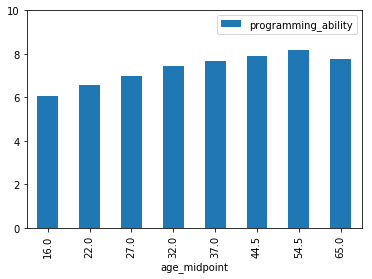

In [9]:
# Does self-reported programming ability increase with age?
df[['age_midpoint','programming_ability']].groupby('age_midpoint').aggregate('mean').plot(kind='bar', ylim=(0, 10.0))